# Introducción al Aprendizaje Automático

## Aprendizaje Supervisado - Métricas para Clasificación y Evaluación de Modelos

#### Conjunto de datos

**Ejercicio:** Cargar el mismo dataset de la guía anterior. En una variable `X` seleccionar los atributos y en una variable `y` el target.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Lic_en_Datos/IAA/datos/IAA_Guia_2_clasificacion_binaria.csv')  #drive mica
data.sample(5)

,x1,x2,target
422,-5.460030,-1.922577,0.0
406,-5.110325,-0.897823,0.0
378,-3.376960,0.334569,0.0
120,-4.260432,0.510933,0.0
13,0.809447,0.467432,1.0


In [10]:
  data.shape

(450, 3)

**Ejercicio:** Separar `X` e `y` en datos de entrenamiento (`X_train,y_train`) y de evaluación (`X_test,y_test`), usando la función `train_test_split` de Scikit-Learn. Toma un 70% para entrenamiento y un 30% para evaluación. Recuerda mirar su documentación y fijar el `random_state`. Por último, ten en cuenta que con `X_test,y_test` **no vamos a entrenar el modelo, sino que vamos a usarlos únicamente para evaluar su desempeño**.


### Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = data[['x1', 'x2']]
Y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42) #test_size = 0.3 da 70% entrenamiento y 30% evaluacion

In [48]:
print("Shape de X:", X.shape)
print("Shape de y:", Y.shape)

Shape de X: (450, 2)
Shape de y: (450,)


### Arbol de Decision

**Ejercicio:** Entrena un árbol de decisión de profundidad máxima 3.


In [49]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=42) #seleccion de modelos y parametros
clf = clf.fit(X_train, y_train) # MODELO ENTRENADO

In [50]:
# Verificar el desempeño en el conjunto de prueba
accuracy = clf.score(X_test, y_test)
print(f"Precisión en test: {accuracy:.4f}")

Precisión en test: 0.9630


### Graficos de Puntos de Entrenamiento

**Ejercicio:** visualiza la frontera de decisión usando la función `visualize_classifier` de la guía anterior. Grafica los puntos de entrenamiento y evaluación, con sus respectivas clases (puedes usar el parámetro alpha, otro marker o cambiar el tamaño para diferenciar entre entrenamiento y evaluación).

In [51]:
# Función que nos ayuda a graficar
# No hace falta que comprandan este bloque de código.
def visualize_classifier(model, X, y, ax=None, proba = False):
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    ax = ax or plt.gca()

    colors_tab10 = plt.cm.tab10.colors

    for i, y_value in enumerate(reversed(np.unique(y))):
        ax.scatter(X[y==y_value, 0], X[y==y_value, 1], s=30,
                   zorder=3, alpha = 0.5, color = colors_tab10[i])

    ax.axis('tight')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    # ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))

    if proba:
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1].reshape(xx.shape)
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    Z = -Z + 1
    ax.pcolormesh(xx,yy,Z,cmap='bwr', vmin = 0, vmax=1, alpha = 0.2)

    ax.set(xlim=xlim, ylim=ylim)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


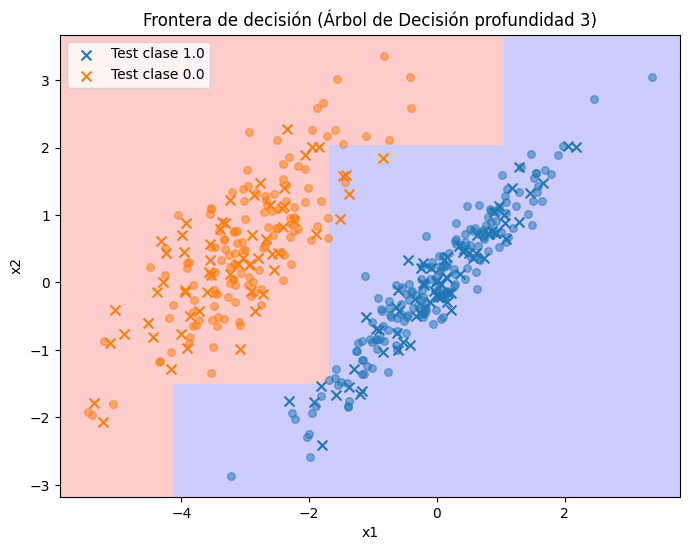

In [52]:
# Graficar frontera de decisión con datos de entrenamiento
fig, ax = plt.subplots(figsize=(8,6))

# Frontera + puntos de entrenamiento
visualize_classifier(clf, X_train, y_train, ax=ax)

# Puntos de test con distinto marker
colors_tab10 = plt.cm.tab10.colors # Definir colores (los de la paleta tab10 de Matplotlib)
for i, y_value in enumerate(reversed(np.unique(y_test))):
    ax.scatter(X_test.values[y_test==y_value, 0],
               X_test.values[y_test==y_value, 1],
               s=50, marker='x', color=colors_tab10[i], # s= tamaño del marcado , marker = forma del marcador , color=indice segun el color , label =etiqueta para la leyenda
               label=f'Test clase {y_value}')

ax.set_title("Frontera de decisión (Árbol de Decisión profundidad 3)")
ax.legend()
plt.show()

**Los puntos (círculos):**
Son los datos de entrenamiento (X_train, y_train), que se grafican con la función visualize_classifier.

* Cada punto representa un registro (una fila) del conjunto de entrenamiento.

* El color de cada punto depende de su clase (target 0 o 1, por ejemplo).

* Se grafican con marcadores circulares (s=30, alpha=0.5).

**Las cruces (x)**
* Son los datos de prueba (X_test, y_test)
* Cada cruz representa un registro del conjunto de prueba.
* También tienen color según la clase verdadera que tiene ese dato (target 0 o 1).
* Se grafican con marcadores de cruz ('x') y tamaño s=50 para destacarlos sobre los puntos de entrenamiento.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


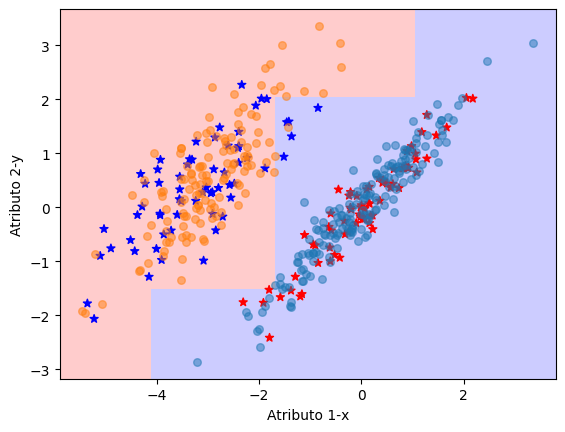

In [53]:
visualize_classifier(clf, X_train, y_train)
plt.scatter(X_test.iloc[:,0], X_test.iloc[:,1], c=y_test ,cmap='bwr', marker='*')
plt.xlabel('Atributo 1-x')
plt.ylabel('Atributo 2-y')
plt.show()

### Confusion MATRIZ

Evalua el rendimiento del modelo de clasificacion en el machine learning comparando valores predichos con los valores reales de un conjunto de datos.

**Ejercicio:** elije una clase como la positiva y otra clase como la negativa. Escribe una función que calcula la matriz de confusión. Aplícala tanto para entrenamiento como para evaluación. No es necesario presentarla en forma de matriz, pero sí es necesario que calcules los totales de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

In [66]:
def confusion_matriz(y_real, y_pred, clase_positiva=1):
    TP = np.sum((y_real == clase_positiva) & (y_pred == clase_positiva)) # true positive
    TN = np.sum((y_real != clase_positiva) & (y_pred != clase_positiva)) # true negative
    FP = np.sum((y_real != clase_positiva) & (y_pred == clase_positiva)) # false positive
    FN = np.sum((y_real == clase_positiva) & (y_pred != clase_positiva)) # false negative

    return TP, FP, TN, FN

In [67]:
# Predicciones
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test) # esto me dice realmente como va mi modelo

In [68]:
# Para entrenamiento
TP_train, FP_train, TN_train, FN_train = confusion_matriz(y_train, y_train_pred)
print("Entrenamiento:")
print(f"TP: {TP_train}, FP: {FP_train}, TN: {TN_train}, FN: {FN_train}")

# Para test
TP_test, FP_test, TN_test, FN_test = confusion_matriz(y_test, y_test_pred)
print("\nTest:")
print(f"TP: {TP_test}, FP: {FP_test}, TN: {TN_test}, FN: {FN_test}")

Entrenamiento:
TP: 178, FP: 1, TN: 136, FN: 0

Test:
TP: 72, FP: 5, TN: 58, FN: 0


### F-SCORE

 Combina las medidas de precisión y exhaustividad para devolver una medida de calidad más general del modelo.

**Ejercicio:** A partir de las matrices de confusión obtenidas, escribe funciones que calculen la exactitud, la precisión, la exhaustividad (recall) y el F1-score para el clasificador. Es conveniente que llamen a la función que escribiste antes. Aplicar tanto sobre entrenamiento como sobre evaluación.

In [72]:
def exactitud(y, y_pred): # todos los que se clasificaron bien sobre el total
    tp, fp, tn, fn = confusion_matriz(y, y_pred)
    exact = (tp + tn) / (tp + tn + fp + fn)
    return exact

def precision(tp,fp): # de todos los que digo q eran positivos cuales realmente eran
    #tp/(tp+fp)
    presc = tp / (tp + fp)
    return presc

def recall(fp,fn): #de los q son positivos y cuales agarro
    rcl = fp / (fp + fn)
    return rcl

def f_score(presc,exat):
    cuenta = (presc * exat)/(presc + exat)
    f_s = 2 * cuenta
    return f_s

In [73]:
# Para train
exat = exactitud(y_train, y_train_pred)
presc = precision(TP_train, FP_train)
rcl = recall(TP_train, FN_train)
f_s = f_score(presc, rcl)

print("train")
print(f'Exactitud = {round(exat, 3)} \nPrecision = {round(presc, 3)} \nRecall = {round(rcl, 3)} \nF_score = {round(f_s, 3)}')

# Para test
exat = exactitud(y_test, y_test_pred)
presc = precision(TP_test, FP_test)
rcl = recall(TP_test, FN_test)
f_s = f_score(presc, rcl)

print("\nTest")
print(f'Exactitud = {round(exat, 3)} \nPrecision = {round(presc, 3)} \nRecall = {round(rcl, 3)} \nF_score = {round(f_s, 3)}')


train
Exactitud = 0.997 
Precision = 0.994 
Recall = 1.0 
F_score = 0.997

Test
Exactitud = 0.963 
Precision = 0.935 
Recall = 1.0 
F_score = 0.966


**Ejercicio:** haz un gráfico de exactitud - calculada en entrenamiento y evaluación - en función de `max_depth` para el árbol de decisión. ¿Qué observas? ¿Qué profundidad elegirías para un árbol de decisión en este caso?¿Por qué?

In [74]:
from sklearn.metrics import accuracy_score
max_depths = np.arange(1, 21)
train_scores = []
test_scores = []
for max_depth in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
  clf = clf.fit(X_train, y_train)

  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)

  train_acc = accuracy_score(y_train, y_train_pred)
  test_acc = accuracy_score(y_test, y_test_pred)

  train_scores.append(train_acc)
  test_scores.append(test_acc)

In [76]:
#clase hecho
from sklearn.metrics import accuracy_score
max_depths = np.arange(1, 21)
train_scores = []
test_scores = []
for max_depth in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth=max_depth, random_state=42)
  clf = clf.fit(X_train, y_train)

  y_train_pred = clf.predict(X_train)
  y_test_pred = clf.predict(X_test)

  train_scores.append(exactitud(y_train,y_train_pred))
  test_scores.append(exactitud(y_test,y_test_pred))

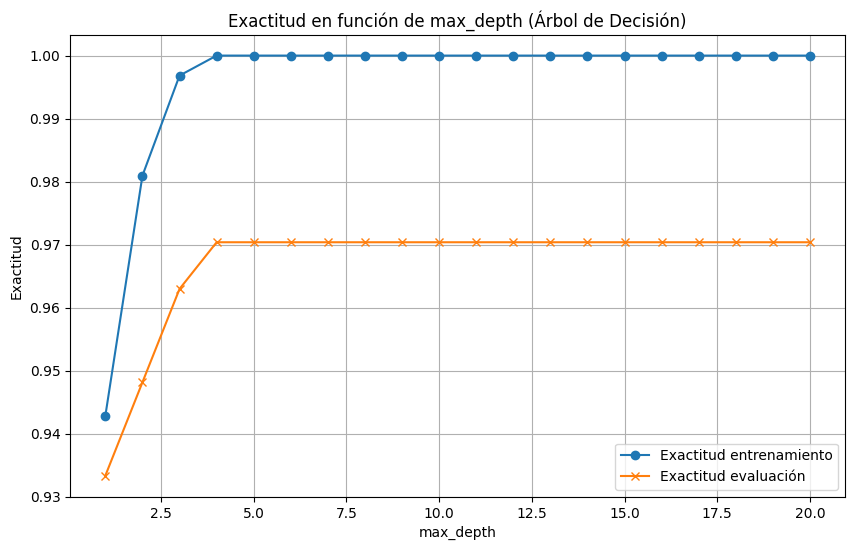

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Exactitud entrenamiento', marker='o')
plt.plot(max_depths, test_scores, label='Exactitud evaluación', marker='x')

plt.xlabel('max_depth')
plt.ylabel('Exactitud')
plt.title('Exactitud en función de max_depth (Árbol de Decisión)')
plt.legend()
plt.grid(True)
plt.show()

Al parecer, con una profundidad máxima de 3 nos quedamos cortos, posiblemente hay un subajuste. El cambio de curvatura se da en max_depth de 4, por lo que sería mejor ese valor de división.

**Ejercicio:** buscar en la documentación de Scikit-Learn cómo se calcula la matriz de confusión, las métricas mencionadas y el `classification_report`. Aplicarlos.

**forma corta de la matriz**

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [79]:
# Para train
print("Train:")
print("Matriz de confusión:\n", confusion_matrix(y_train, y_train_pred))
print("Exactitud:", round(accuracy_score(y_train, y_train_pred), 3))
print("Precisión:", round(precision_score(y_train, y_train_pred), 3))
print("Recall:", round(recall_score(y_train, y_train_pred), 3))
print("F1-score:", round(f1_score(y_train, y_train_pred), 3))
print("\nReporte completo:\n", classification_report(y_train, y_train_pred))

# Para test
print("\nTest:")
print("Matriz de confusión:\n", confusion_matrix(y_test, y_test_pred))
print("Exactitud:", round(accuracy_score(y_test, y_test_pred), 3))
print("Precisión:", round(precision_score(y_test, y_test_pred), 3))
print("Recall:", round(recall_score(y_test, y_test_pred), 3))
print("F1-score:", round(f1_score(y_test, y_test_pred), 3))
print("\nReporte completo:\n", classification_report(y_test, y_test_pred))


Train:
Matriz de confusión:
 [[137   0]
 [  0 178]]
Exactitud: 1.0
Precisión: 1.0
Recall: 1.0
F1-score: 1.0

Reporte completo:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       137
         1.0       1.00      1.00      1.00       178

    accuracy                           1.00       315
   macro avg       1.00      1.00      1.00       315
weighted avg       1.00      1.00      1.00       315


Test:
Matriz de confusión:
 [[59  4]
 [ 0 72]]
Exactitud: 0.97
Precisión: 0.947
Recall: 1.0
F1-score: 0.973

Reporte completo:
               precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        63
         1.0       0.95      1.00      0.97        72

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135



# 2. Conjunto de datos de Pingüinos

Aplicar los visto al conjunto de datos de Pingüinos. Para ello:

1. Evaluar un clasificador para predecir el género de un pingüino a partir de sus atributos físicos. Hacerlo por medio de train-test split.

1. Evaluar un clasificador para predecir la especie de un pingüino a partir de sus atributos físicos. Hacerlo por medio de train-test split.

Utilizar las herramientas provistas por Scikit-Learn.

In [80]:
data = pd.read_csv('/content/drive/MyDrive/Lic_en_Datos/IAA/datos/penguins_size.csv')  #drive mica
data.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE
29,Adelie,Biscoe,40.5,18.9,180.0,3950.0,MALE
59,Adelie,Biscoe,37.6,19.1,194.0,3750.0,MALE
285,Gentoo,Biscoe,49.8,16.8,230.0,5700.0,MALE


In [82]:
# Eliminar filas con valores nulos
data.dropna(inplace=True)

In [83]:
data.shape

(334, 7)

### 1.

In [ ]:
from sklearn.model_selection import train_test_split

In [86]:
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['sex']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [87]:
clf_sex = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_sex.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [88]:
y_train_pred = clf_sex.predict(X_train)
y_test_pred = clf_sex.predict(X_test)

# Train
print("Clasificación de Género - Train")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Test
print("Clasificación de Género - Test")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Clasificación de Género - Train
[[  0   1   0]
 [  0 106  10]
 [  0  11 105]]
              precision    recall  f1-score   support

           .       0.00      0.00      0.00         1
      FEMALE       0.90      0.91      0.91       116
        MALE       0.91      0.91      0.91       116

    accuracy                           0.91       233
   macro avg       0.60      0.61      0.61       233
weighted avg       0.90      0.91      0.90       233

Clasificación de Género - Test
[[38 11]
 [ 5 47]]
              precision    recall  f1-score   support

      FEMALE       0.88      0.78      0.83        49
        MALE       0.81      0.90      0.85        52

    accuracy                           0.84       101
   macro avg       0.85      0.84      0.84       101
weighted avg       0.85      0.84      0.84       101



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### 2.

In [89]:
X = data[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
clf_species = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_species.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [92]:
y_train_pred = clf_species.predict(X_train)
y_test_pred = clf_species.predict(X_test)

# Train
print("Clasificación de Especie - Train")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

# Test
print("Clasificación de Especie - Test")
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Clasificación de Especie - Train
[[93  4  0]
 [ 3 47  0]
 [ 0  1 85]]
              precision    recall  f1-score   support

      Adelie       0.97      0.96      0.96        97
   Chinstrap       0.90      0.94      0.92        50
      Gentoo       1.00      0.99      0.99        86

    accuracy                           0.97       233
   macro avg       0.96      0.96      0.96       233
weighted avg       0.97      0.97      0.97       233

Clasificación de Especie - Test
[[49  0  0]
 [ 2 16  0]
 [ 0  0 34]]
              precision    recall  f1-score   support

      Adelie       0.96      1.00      0.98        49
   Chinstrap       1.00      0.89      0.94        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.98       101
   macro avg       0.99      0.96      0.97       101
weighted avg       0.98      0.98      0.98       101




# 3. Más ejercicios

**Ejercicio - Métricas:**
1. En un problema de clasificación binaria, ¿a qué se denomina clase positiva y a qué clase negativa? Si nuestro problema consiste en clasificar spam vs. no-spam, ¿cuál es la clase positiva? Si nuestro problema es clasificar imágenes de perros vs. gatos, ¿cuál es la clase positiva?

1. Explicar con tus palabras la definición de verdadero positivo, verdadero negativo, falso positivo y falso negativo.

1. ¿Por qué podría un falso positivo ser considerado más (o menos) importante que un falso negativo? Dar un ejemplo en donde es más grave tener falsos negativos que falsos positivos.

1. Explicar con tus palabras la definición de accuracy, precision y recall. ¿En qué situaciones serán más útiles cada una de estas métricas?

1. ¿Por qué es un problema medir accuracy de un clasificador para compararlo con otro? (Pensar en desbalance de clases.) Dar un ejemplo en donde sería engañoso utilizar esta comparación.

1. Construyes un clasificador que devuelve siempre la clase positiva. ¿Qué exactitud, precisión y recall esperarías para este clasificador?¿Hace falta más información?

**Ejercicio:** Un modelo tiene una exactitud de 0.90 en entrenamiento y 0.60 en evaluación. ¿Qué puede decir sobre el modelo?

**Ejercicio:** La exhaustividad/recall/TPR y la precisión no tienen en cuenta los verdaderos negativos. ¿Existe alguna métrica que sí lo haga?¿Por qué podría ser útil? Existe una que es "hermana" de la exhaustividad. Averigua cómo se llama y en qué contextos suele aplicarse.

**Ejercicio:** Supongamos que un clasificador devuelve etiquetas al azar en un contexto binario, balanceado. ¿Qué valores esperarías para la exactitud, la precisión y la exhaustividad?¿Por qué?

**Ejercicio:** Repite el ejercicio anterior, pero ahora en lugar de dos clases, tienes tres. Solamente hazlo para exactitud. ¿Y con cuatro?¿Y con *n* clases?


**Ejercicio:** Explicar que es el subajuste y el sobreajuste. Elegir algún problema binario visto o inventado durante las clases anteriores y dibujar la frontera de decisión para el caso con dos atributos de un modelo que esté subajustado y otro que esté sobreajustado.


**Ejercicio:** Verdadero o Falso. Justificar.

1. Un árbol de decisión puede conseguir 100 % de aciertos en los datos de entrenamiento.
1. Un árbol de decisión consigue 100 % de aciertos en los datos de entrenamiento siempre y cuando no haya contradicciones entre las etiquetas de instancias muy similares.


**Ejercicio:** en la clase teórica vimos que al hacer train-test split  los datos no siempre deben separarse al azar. ¿Por qué? Pensar al menos dos situaciones en las cuales no sea conveniente.



*Qué es clase positiva y clase negativa?*
En clasificación binaria:

* La clase positiva es aquella que nos interesa detectar especialmente.

* La clase negativa es la otra categoría.

Ejemplos:

* En spam vs. no-spam :la clase positiva es spam (porque
nos interesa identificar los correos basura).

* En perros vs. gatos : depende qué te interese más. Si tu modelo busca identificar perros, entonces perro sería la clase positiva.



📌 2️⃣ Definición de VP, VN, FP, FN
Verdadero Positivo (VP): cuando el modelo predice positiva y es efectivamente positiva.
👉 Ej: predice spam y efectivamente era spam.

Verdadero Negativo (VN): cuando predice negativa y es realmente negativa.
👉 Ej: predice no-spam y efectivamente era no-spam.

Falso Positivo (FP): cuando predice positiva pero en realidad es negativa.
👉 Ej: marca como spam un mail importante.

Falso Negativo (FN): cuando predice negativa pero en realidad es positiva.
👉 Ej: deja pasar un correo spam como si fuera normal.

📌 3️⃣ ¿Por qué un FP podría ser más o menos importante que un FN?
Depende del contexto:

📌 Ejemplo donde un falso negativo es más grave:

Detección de cáncer:
Si un paciente tiene cáncer (positiva) y el modelo dice que no (negativa), se le puede escapar el tratamiento, lo cual es crítico.

📌 Ejemplo donde un falso positivo es más molesto:

Detección de spam:
Si un mail importante se marca como spam, es un falso positivo. Es molesto, pero no tan grave como dejar pasar un spam peligroso (falso negativo) si ese contiene phishing.

📌 4️⃣ Definición de Accuracy, Precision y Recall
Accuracy (exactitud)
👉 Proporción de predicciones correctas sobre el total.
📌 Útil cuando las clases están balanceadas.

Precision (precisión)
👉 Proporción de positivos predichos que son realmente positivos.
📌 Útil cuando el costo de un FP es alto (Ej: no etiquetar como spam un mail importante).

Recall (sensibilidad)
👉 Proporción de positivos verdaderos detectados correctamente.
📌 Útil cuando un FN es muy costoso (Ej: detección de cáncer).

📌 5️⃣ ¿Por qué no basta con Accuracy para comparar clasificadores?
Porque puede ser engañoso si las clases están desbalanceadas.

📌 Ejemplo:

Dataset con 99% no-spam y 1% spam.

Clasificador trivial que siempre predice no-spam tendrá 99% de accuracy, pero no sirve porque nunca detecta spam.

En este caso es mejor mirar precision y recall.

📌 6️⃣ Si construís un clasificador que siempre predice clase positiva:
📌 Exactitud (accuracy)
👉 Depende del porcentaje de positivos en los datos.

Ej: si 30% de los datos son positivos y el modelo siempre dice "positivo", tendrá 30% de exactitud.

📌 Precisión (precision)
👉 ¿Cuántos de los que predije positivo, realmente lo son?
Como predigo todo positivo, precisión = proporción de positivos reales sobre todos los datos.

Ej: si hay 30% positivos → precisión = 30%.

📌 Recall (sensibilidad)
👉 Detecto todos los positivos, porque predigo todo positivo.
Recall = 1.

Falta más información para conocer la exactitud y precisión exactas (porque depende de la proporción de clases).

¿Por qué no confiar solo en Accuracy?
* Si tenés clases desbalanceadas, un accuracy alto puede ser engañoso.
Ejemplo:
99% de los mails son no-spam → clasificador que siempre predice no-spam tiene 99% de accuracy pero no detecta ningún spam.

*Un modelo tiene una exactitud de 0.90 en entrenamiento y 0.60 en evaluación. ¿Qué puede decir sobre el modelo?*

Modelo funciona muy bien en los datos de entrenamiento pero bastante mal en los datos de prueba (datos nuevos) . Hay **sobreajuste** . Causas :
* Arbol de decision muy profundo
* Pocos datos de entrenamiento
* Modelo sin regularizacion (es una técnica que se usa para controlar la complejidad del modelo y evitar que se sobreajuste a los datos de entrenamiento.)

Que hacer ?
* Reducir complejidad del modelo (menos profundidad, poda).
* Aplicar más regularizaciones
* Probar con un modelo más simple o ajustar hiperparámetros.
* Agregar más datos si es posible.
